# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
uom = "metric"
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={uom}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | stanley
Processing Record 2 of Set 1 | touros
Processing Record 3 of Set 1 | kochkor-ata
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | taltal
Processing Record 8 of Set 1 | crane
Processing Record 9 of Set 1 | callao
Processing Record 10 of Set 1 | bilibino
Processing Record 11 of Set 1 | diawara
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | ilulissat
Processing Record 14 of Set 1 | selfoss
Processing Record 15 of Set 1 | saint-joseph
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | lompoc
Processing Record 18 of Set 1 | invercargill
Processing Record 19 of Set 1 | namtsy
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | juneau
Processing Record 22 of Set 1 | cuito
Processing Record 23 of Set 1

Processing Record 39 of Set 4 | san pedro pochutla
Processing Record 40 of Set 4 | genhe
Processing Record 41 of Set 4 | margate
Processing Record 42 of Set 4 | sinabang
Processing Record 43 of Set 4 | fort st. john
Processing Record 44 of Set 4 | ikwiriri
Processing Record 45 of Set 4 | dublin
Processing Record 46 of Set 4 | papatowai
Processing Record 47 of Set 4 | puerto santa
Processing Record 48 of Set 4 | tralee
Processing Record 49 of Set 4 | petropavlovsk-kamchatsky
Processing Record 0 of Set 5 | nar'yan-mar
Processing Record 1 of Set 5 | east london
Processing Record 2 of Set 5 | kayangel
Processing Record 3 of Set 5 | eidson road
Processing Record 4 of Set 5 | el granada
Processing Record 5 of Set 5 | nemuro
Processing Record 6 of Set 5 | pervomayka
Processing Record 7 of Set 5 | waynesville
Processing Record 8 of Set 5 | yilan
Processing Record 9 of Set 5 | asarganj
Processing Record 10 of Set 5 | sao gabriel da cachoeira
Processing Record 11 of Set 5 | myawadi
City not foun

Processing Record 30 of Set 8 | rio verde de mato grosso
Processing Record 31 of Set 8 | al 'alamayn
City not found. Skipping...
Processing Record 32 of Set 8 | ad dawadimi
Processing Record 33 of Set 8 | mersa matruh
Processing Record 34 of Set 8 | kununurra
Processing Record 35 of Set 8 | newnham
Processing Record 36 of Set 8 | terrace
Processing Record 37 of Set 8 | vadso
Processing Record 38 of Set 8 | new norfolk
Processing Record 39 of Set 8 | chapar
Processing Record 40 of Set 8 | arfoud
Processing Record 41 of Set 8 | gaiman
Processing Record 42 of Set 8 | pangai
Processing Record 43 of Set 8 | zag
Processing Record 44 of Set 8 | vytegra
Processing Record 45 of Set 8 | tokar
Processing Record 46 of Set 8 | selkirk
Processing Record 47 of Set 8 | tyukhtet
Processing Record 48 of Set 8 | mufumbwe
Processing Record 49 of Set 8 | giyani
Processing Record 0 of Set 9 | cable beach
City not found. Skipping...
Processing Record 1 of Set 9 | sungailiat
Processing Record 2 of Set 9 | pra

Processing Record 15 of Set 12 | rabo de peixe
Processing Record 16 of Set 12 | ishigaki
Processing Record 17 of Set 12 | cockburn town
Processing Record 18 of Set 12 | alofi
Processing Record 19 of Set 12 | tolanaro
Processing Record 20 of Set 12 | gadzhiyevo
Processing Record 21 of Set 12 | saint-philippe
Processing Record 22 of Set 12 | canyon lake
Processing Record 23 of Set 12 | mogadishu
Processing Record 24 of Set 12 | dalianwan
Processing Record 25 of Set 12 | aqadyr
Processing Record 26 of Set 12 | aripuana
Processing Record 27 of Set 12 | frenda
Processing Record 28 of Set 12 | marang
Processing Record 29 of Set 12 | acarau
Processing Record 30 of Set 12 | lazaro cardenas
Processing Record 31 of Set 12 | prieska
Processing Record 32 of Set 12 | barcelona
Processing Record 33 of Set 12 | tobelo
Processing Record 34 of Set 12 | binhe
Processing Record 35 of Set 12 | idri
Processing Record 36 of Set 12 | guerrero negro
Processing Record 37 of Set 12 | tanjung selor
City not foun

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,stanley,54.8680,-1.6985,15.98,90,75,3.09,GB,1694948922
1,touros,-5.1989,-35.4608,27.98,67,13,7.71,BR,1694948898
2,kochkor-ata,41.0389,72.4833,29.37,20,71,2.78,UZ,1694949105
3,adamstown,-25.0660,-130.1015,18.95,68,97,6.71,PN,1694949105
4,thompson,55.7435,-97.8558,8.45,99,48,3.02,CA,1694949105


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanley,54.8680,-1.6985,15.98,90,75,3.09,GB,1694948922
1,touros,-5.1989,-35.4608,27.98,67,13,7.71,BR,1694948898
2,kochkor-ata,41.0389,72.4833,29.37,20,71,2.78,UZ,1694949105
3,adamstown,-25.0660,-130.1015,18.95,68,97,6.71,PN,1694949105
4,thompson,55.7435,-97.8558,8.45,99,48,3.02,CA,1694949105


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [8]:
# Created a function to reproduce the scatter plots
def build_scatter(x,y):
    plt.scatter(city_data_df[x], city_data_df[y], c="red", marker="X", edgecolor="black", linewidths=0.5)
    plt.grid()

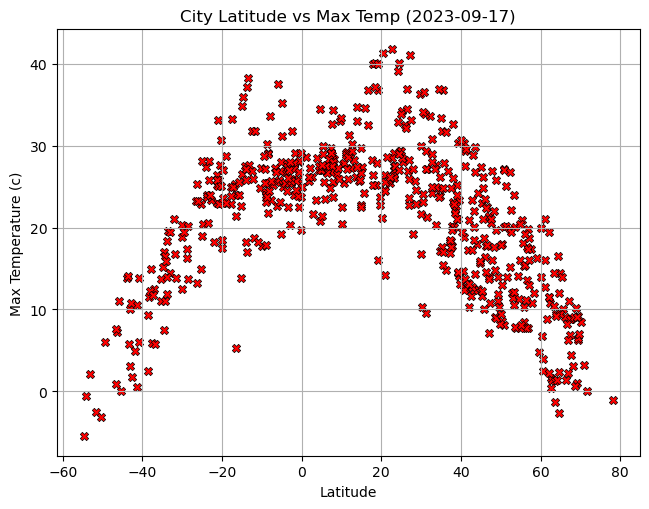

In [9]:
# https://stackoverflow.com/a/75222939/21871037
# title=(f"Latitude vs Max Temp ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})"))

# Build scatter plot for latitude vs. temperature
build_scatter("Lat", "Max Temp")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.title(f"City Latitude vs Max Temp ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

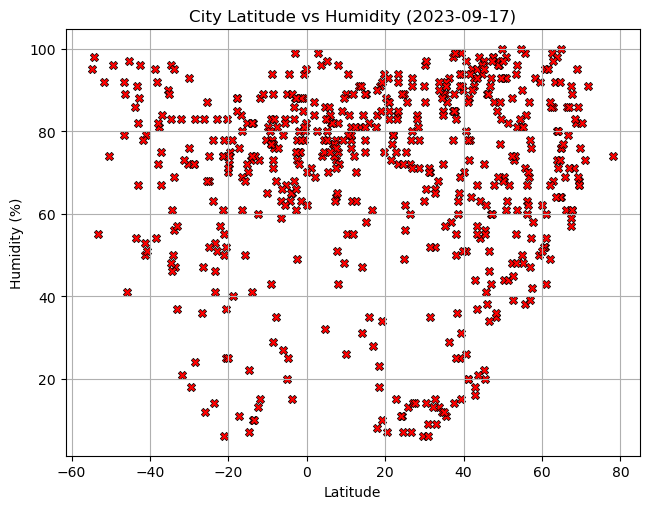

In [10]:
# Build the scatter plots for latitude vs. humidity
build_scatter("Lat", "Humidity")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

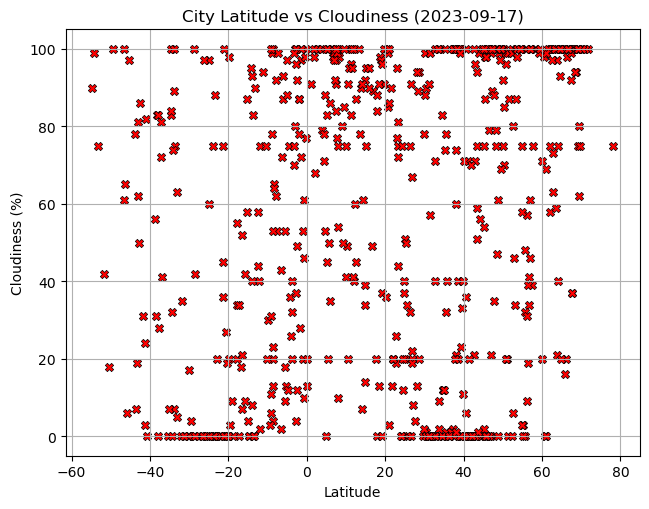

In [11]:
# Build the scatter plots for latitude vs. cloudiness
build_scatter("Lat", "Cloudiness")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

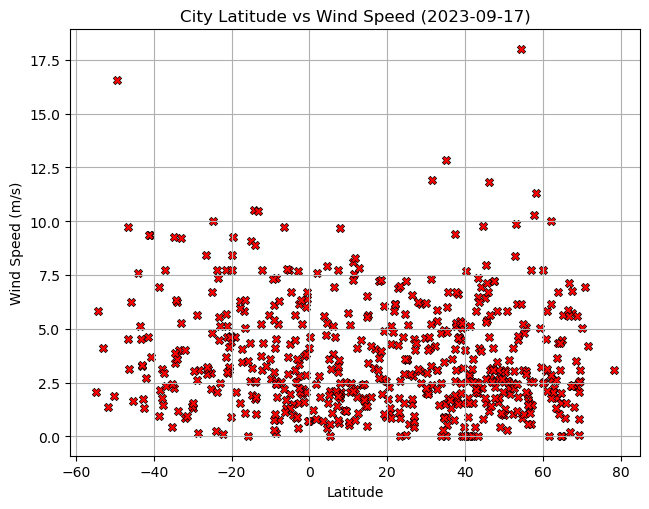

In [12]:
# Build the scatter plots for latitude vs. wind speed
build_scatter("Lat","Wind Speed")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs Wind Speed ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [52]:
# Define a function to create Linear Regression plots
def linregress_plot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress = x * slope + intercept
    line_eq = (f"y = {round(slope,2)}x + {round(intercept,2)}")
    print(f"The r-value is: {rvalue}")
    plt.scatter(x, y, c="blue", marker="X", edgecolor="black", linewidths=0.5)
    plt.plot(x,regress,"r")
    plt.annotate(line_eq,(x.min(),y.min()),color="r",fontsize=12)
    plt.tight_layout()

In [53]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanley,54.8680,-1.6985,15.98,90,75,3.09,GB,1694948922
2,kochkor-ata,41.0389,72.4833,29.37,20,71,2.78,UZ,1694949105
4,thompson,55.7435,-97.8558,8.45,99,48,3.02,CA,1694949105
5,iqaluit,63.7506,-68.5145,-1.28,80,21,1.79,CA,1694949105
7,crane,31.3974,-102.3501,21.33,70,57,2.40,US,1694949106


In [54]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,touros,-5.1989,-35.4608,27.98,67,13,7.71,BR,1694948898
3,adamstown,-25.0660,-130.1015,18.95,68,97,6.71,PN,1694949105
6,taltal,-25.4000,-70.4833,14.98,87,0,2.21,CL,1694949106
8,callao,-12.0667,-77.1500,18.73,88,75,3.09,PE,1694949106
11,edinburgh of the seven seas,-37.0676,-12.3116,12.51,75,72,7.72,SH,1694949107


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7497744387567264


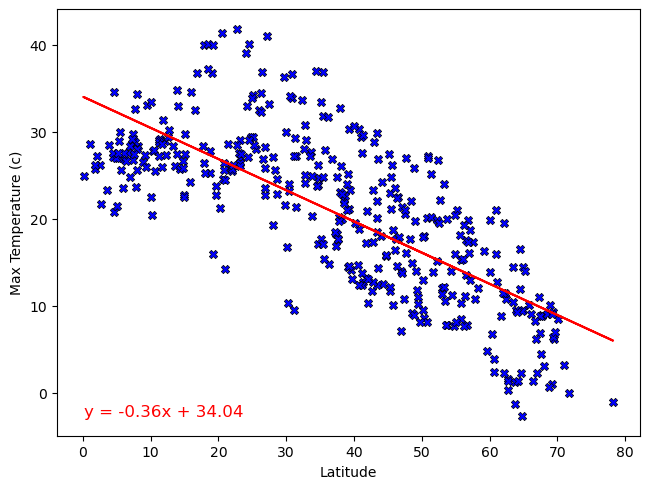

In [55]:
# Linear regression on Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.show()

The r-value is: 0.7986760827847411


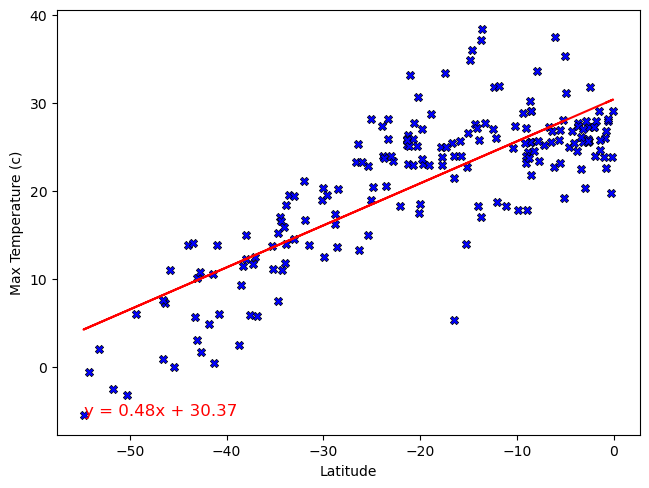

In [56]:
# Linear regression on Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.show()

**Discussion about the linear relationship:**  

    - With an 'r-value' of -0.749 and 0.798, there's a strong correlation between the distance from the equator and the Max Temperature
        - The northern hemisphere has a strong negative correlation
        - The southern hemisphere has a strong positive correlation

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.030128864398827546


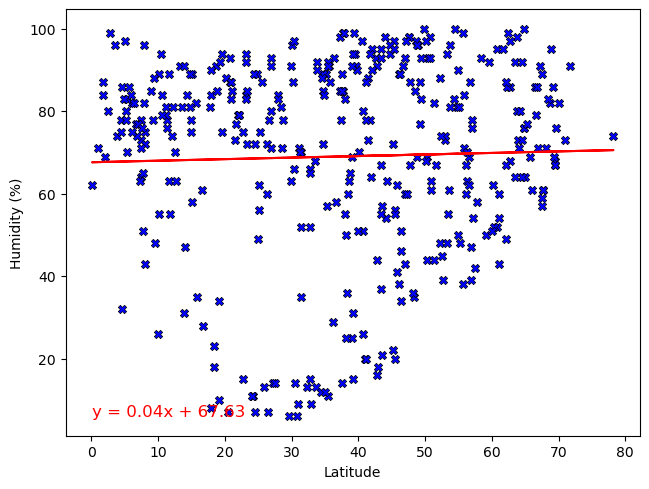

In [57]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

The r-value is: -0.043553107672066146


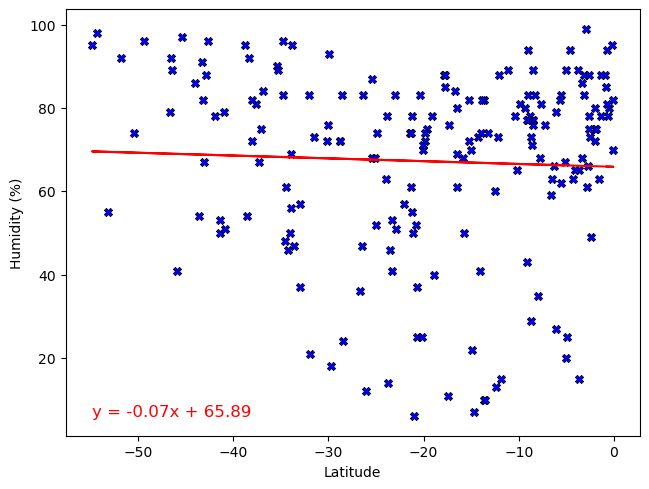

In [59]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

**Discussion about the linear relationship:**  

    - Although there's little correlation between Latitude and Humidity, you can clearly see within the scatter plots that for both the Northern and Southern Hemisphere, city's located closest to the equator have Humidity levels > 60%.
    - It would be interesting to look at the city correlation of -10 to 10 latitude degrees from the equator and the Humidity to see if a stronger correlation exists without the outliers of further latitudes affecting the result.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.042093251220393854


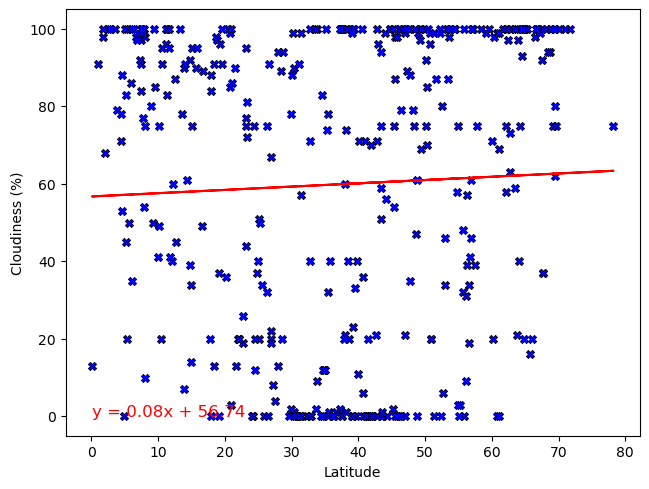

In [60]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

The r-value is: 0.062159747693784184


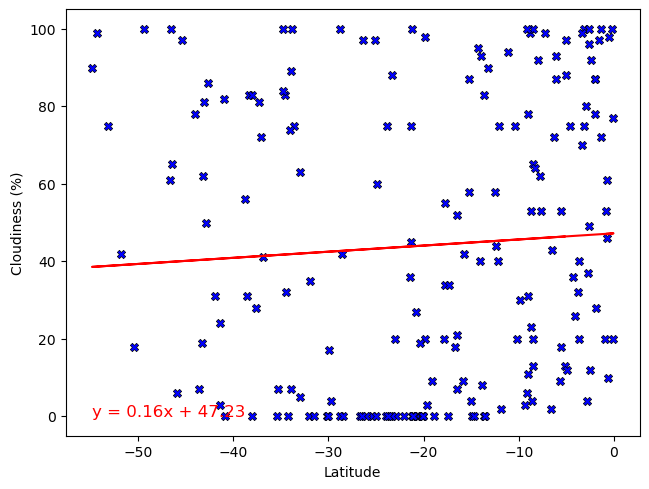

In [61]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

**Discussion about the linear relationship:**  

    - Much like Humidity, there's very little correlation between Cloudiness and a City's Latitude.
    - The scatter plots show that cities in the northern hemisphere have much more cloud coverage above 60% than that of the southern hemisphere cities.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.016467501163801274


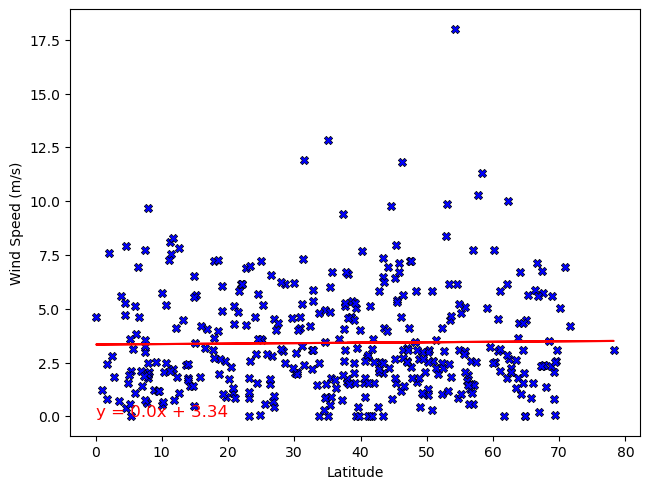

In [62]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

The r-value is: -0.11622953563744874


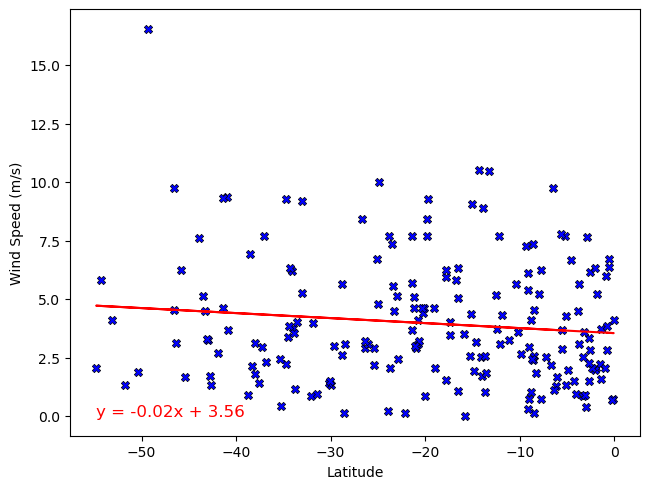

In [63]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

**Discussion about the linear relationship:**  

    - Again there's very little correlation between Wind Speed and City Latitude for both Northern and Southern Hemisphere Cities.